
# Project: Investigate a Dataset (noshowappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report we will analyse the noshowappointments dataset. We will understand the data first then try to exctract some key features that may help us know wether a patient would show on time or no 

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### noshowappointments Dataset

In [338]:
#load Data
df = pd.read_csv(r'C:\Users\georg\Downloads\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [339]:
#Convert Dates into Datetime
pd.to_datetime(df["ScheduledDay"],utc=True)
pd.to_datetime(df["AppointmentDay"],utc=True)

#for better understanding the no-show column
df['No-show'] = df['No-show'].map({'No':1 ,'Yes':0})
df.rename(columns={"No-show": "Show"},inplace=True)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


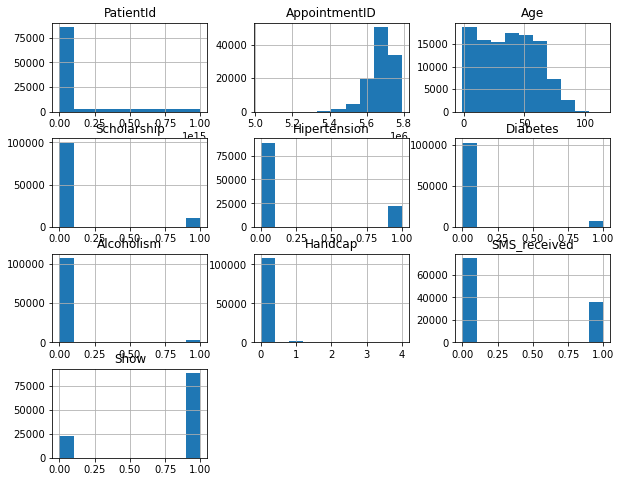

In [340]:
df.hist(figsize=(10,8));
df.describe()

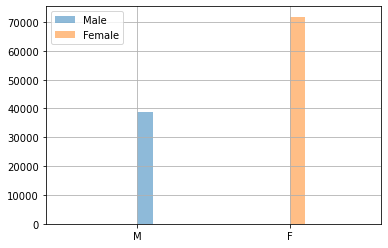

In [341]:
Male = df.Gender == "M"
Female = df.Gender == "F"

df.Gender[Male].hist(alpha=0.5,label='Male')
df.Gender[Female].hist(alpha=0.5,label='Female')
plt.legend();

### Data Cleaning

In [342]:
#drop unwanted columns
df.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)

In [343]:
#drop inconsistent rows

#Handcap values should be eihter 1 or 0
df = df[df.Handcap <= 1]
#Appointment Days should be after the Scheduale Day
df=df[df.AppointmentDay>df.ScheduledDay]
#There is no age under 0
df=df[df.Age>=0]
#drop duplicates
df.drop_duplicates()

#check for nulls
print(df.isna().sum())

df.head()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Show              0
dtype: int64


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1
10,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

> 


### First question: Does the Neighbourhood have any effect on whether a patient will show or not.
### Answer: as we can see that all patient from ILHAS OCEÂNICAS DE TRINDADE didn't show while most patient the ILHA DO BOI have come in the scheduled time


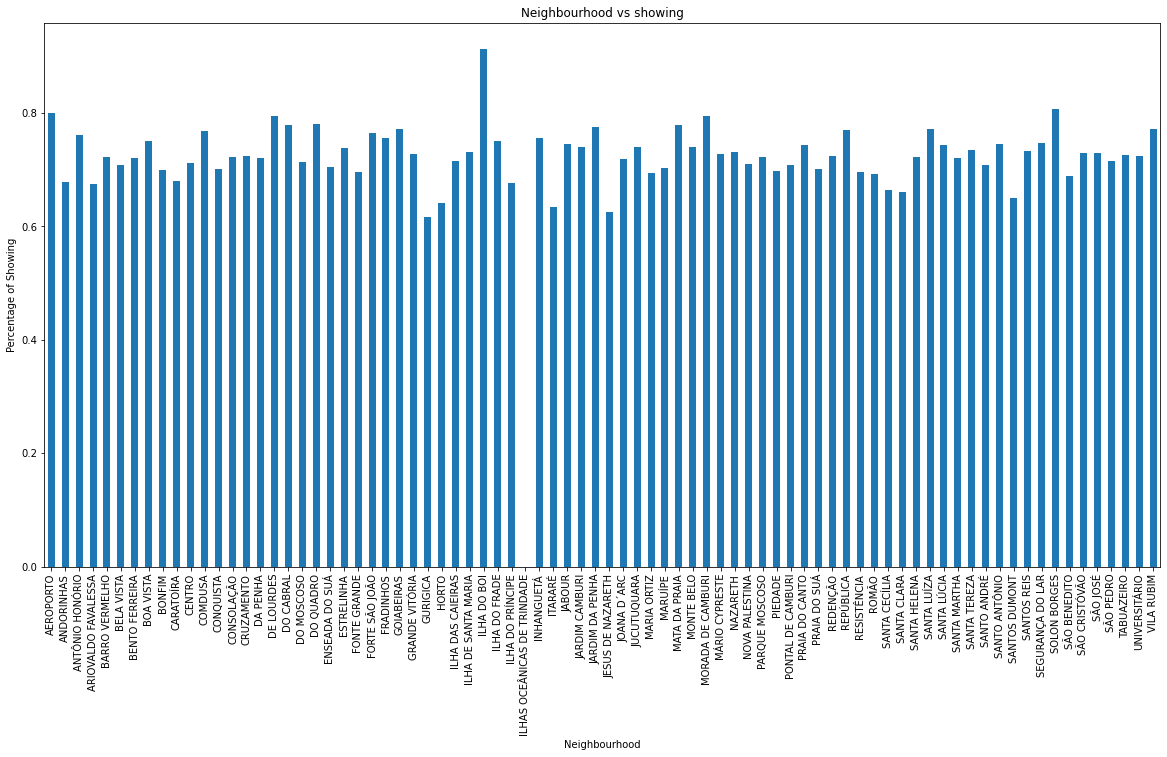

In [344]:
neigh=df.groupby(["Neighbourhood"]).Show.mean().plot(kind="bar",figsize=(20,10),ylabel="Percentage of Showing",title="Neighbourhood vs showing");

### Second question: Does the patients enrolled in Brasilian welfare program Bolsa Família are more likely to come show on the scheduled date??
### Answer: No, Brasilian welfare program Bolsa Família doesn't affect that much on whether a patient will show or not

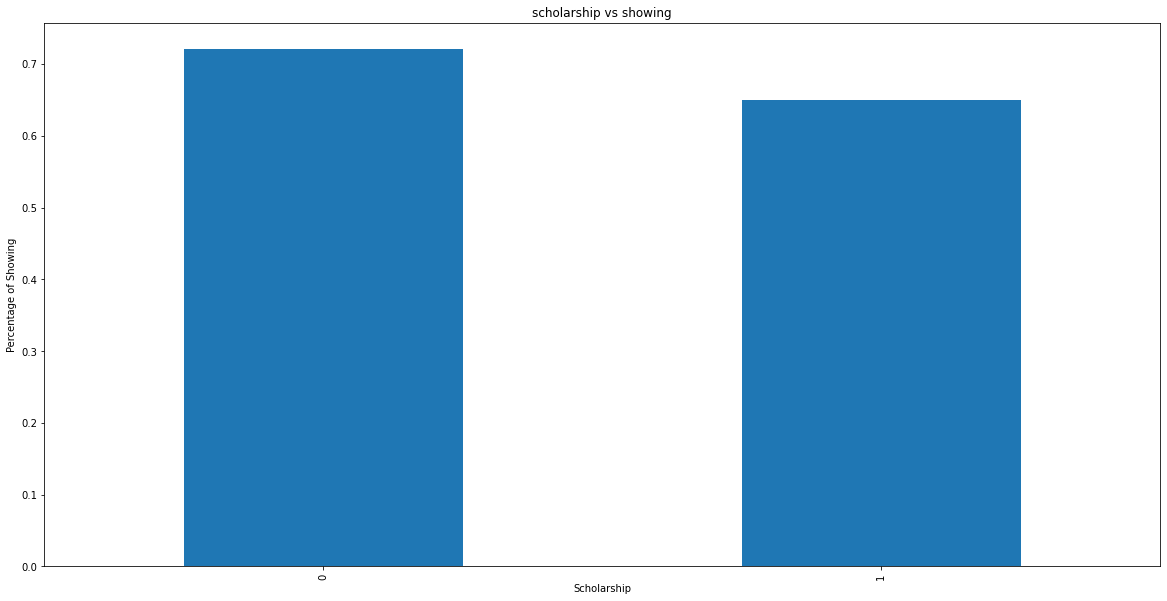

In [345]:
df.groupby("Scholarship").Show.mean().plot(kind="bar",figsize=(20,10),ylabel="Percentage of Showing",title="scholarship vs showing");

### Third question: Does older patients are more likley to come on schedualed date?
### Answer: yes, we can see that as the age increase the probability of showing on time increase.

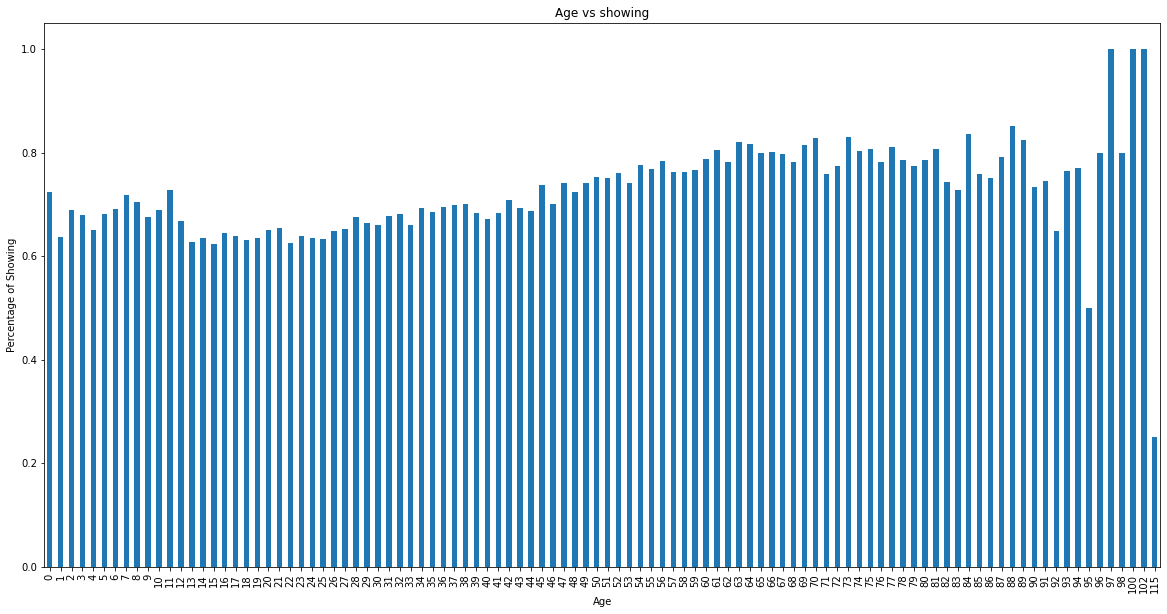

In [346]:
df.groupby("Age").Show.mean().plot(kind="bar",figsize=(20,10),ylabel="Percentage of Showing",title="Age vs showing");

### Fourth Question: Is the period between scheduled day and appointment day affecting the number of no-show appointments?
### Answer: Yes, most show Patients tends to scheduale before the appointment with at least 5 days or more


In [347]:
import datetime 
df["diff"] = pd.to_datetime(df.AppointmentDay) - pd.to_datetime(df.ScheduledDay)>=datetime.timedelta(days=5)
df["diff"] = df['diff'].map({True:'more' ,False:'less'})
df["Show"] = df['Show'].map({1:'Show' ,0:'No-show'})


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,diff
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,Show,less
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,No-show,less
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,No-show,less
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,Show,less
10,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Show,less


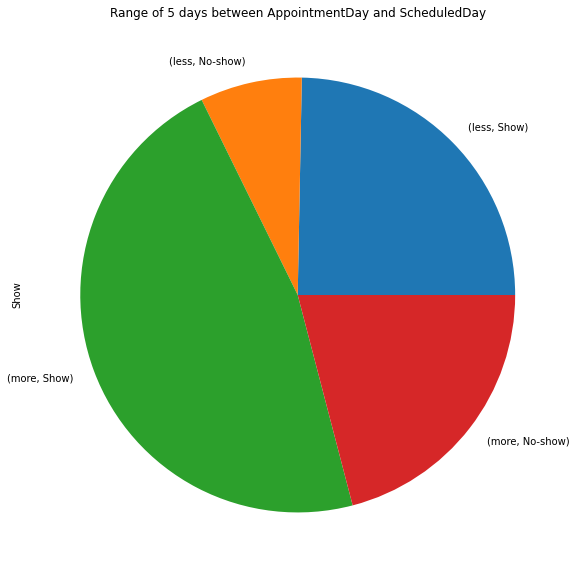

In [348]:
df.groupby("diff").Show.value_counts().plot.pie(figsize=(20,10),title="Range of 5 days between AppointmentDay and ScheduledDay");
df.head()

<a id='conclusions'></a>
## Conclusions



# As stated above, we can get some conclusions.First,Female patients are way more that male paitnents. second:3 major factors that may deteramine wether a paitent will show on time or not: Age , Neighbourhood, and number of days between appointment and schedule days. And we have spotted that the Brasilian welfare program Bolsa Família doesn't effect in the probabilty of showing on time however none enrolled members are more likely to show on time.

## Limitations: there are some hindrances in our dataset
> 1.Handcap values should be either one or zero (yes or no)

> 2.There should be no Age less than zero

> 3.AppointmentDay can't be before the scheduled day

These limitaions could be due to a weak reservations system and it must be taken into consideration because it may affect the accuacy of predicting the show and non-show pateints